# Ford GOBIKE DATA EXPLORATION
## CHUHANG CHEN

## Preliminary Wrangling

> This document explores a dataset containing about 3 millions individual rides made in FordGoBike bike-sharing system, covering the greater San Francisco Bay area, from 2017-6-28 - 2019-1-1

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [5]:
# merge multiple dataset from 2017-1 to 2018-12 into bake_share and save to bike_share.csv
#file_names = !ls | grep csv 
#full_data_list = [pd.read_csv(name) for name in file_names[::-1]]
#bike_share = pd.concat(full_data_list)
#bike_share.to_csv("bike_share.csv", index = False)

In [6]:
# load the dataset containing full data
dtypes = {'bike_id': int, 'end_time': str, 'start_time': str}
parse_dates = ['end_time', 'start_time']
bike = pd.read_csv('bike_share.csv', dtype = dtypes, parse_dates=parse_dates)
bike.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,3305,No,68529,217.0,37.817015,-122.271761,27th St at MLK Jr Way,2019-01-01 15:05:21.558,NaN,NaN,217.0,37.817015,-122.271761,27th St at MLK Jr Way,2018-12-31 20:03:11.735,Customer
1,4281,No,63587,NaN,37.400000,-121.940000,NaN,2019-01-01 12:40:19.366,1995.0,Male,NaN,37.400000,-121.940000,NaN,2018-12-31 19:00:32.121,Customer
2,4267,No,64169,NaN,37.400000,-121.940000,NaN,2019-01-01 08:58:30.091,1988.0,Male,NaN,37.400000,-121.940000,NaN,2018-12-31 15:09:01.082,Customer
3,5422,Yes,30550,19.0,37.788975,-122.403452,Post St at Kearny St,2019-01-01 03:55:30.793,1986.0,Male,13.0,37.794231,-122.402923,Commercial St at Montgomery St,2018-12-31 19:26:20.775,Subscriber
4,4820,No,2150,368.0,37.785434,-122.419622,Myrtle St at Polk St,2019-01-01 00:35:02.153,NaN,NaN,3.0,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2018-12-31 23:59:12.097,Customer


In [7]:
#make a copy of the original dataset
bike_share= bike.copy()

In [8]:
bike_share

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,3305,No,68529,217.0,37.817015,-122.271761,27th St at MLK Jr Way,2019-01-01 15:05:21.558,NaN,NaN,217.0,37.817015,-122.271761,27th St at MLK Jr Way,2018-12-31 20:03:11.735,Customer
1,4281,No,63587,NaN,37.400000,-121.940000,NaN,2019-01-01 12:40:19.366,1995.0,Male,NaN,37.400000,-121.940000,NaN,2018-12-31 19:00:32.121,Customer
2,4267,No,64169,NaN,37.400000,-121.940000,NaN,2019-01-01 08:58:30.091,1988.0,Male,NaN,37.400000,-121.940000,NaN,2018-12-31 15:09:01.082,Customer
3,5422,Yes,30550,19.0,37.788975,-122.403452,Post St at Kearny St,2019-01-01 03:55:30.793,1986.0,Male,13.0,37.794231,-122.402923,Commercial St at Montgomery St,2018-12-31 19:26:20.775,Subscriber
4,4820,No,2150,368.0,37.785434,-122.419622,Myrtle St at Polk St,2019-01-01 00:35:02.153,NaN,NaN,3.0,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2018-12-31 23:59:12.097,Customer
5,5549,Yes,2149,368.0,37.785434,-122.419622,Myrtle St at Polk St,2019-01-01 00:35:01.685,1982.0,Male,3.0,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2018-12-31 23:59:11.882,Subscriber
6,4706,No,2502,44.0,37.781074,-122.411738,Civic Center/UN Plaza BART Station (Market St ...,2019-01-01 00:28:07.356,1973.0,Male,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2018-12-31 23:46:24.943,Customer
7,5518,No,8202,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-01 00:28:05.173,1995.0,Male,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-12-31 22:11:22.506,Customer
8,4800,No,2170,21.0,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),2019-01-01 00:23:30.130,1999.0,Female,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-12-31 23:47:19.210,Customer
9,4747,No,3645,8.0,37.799953,-122.398525,The Embarcadero at Vallejo St,2019-01-01 00:23:27.268,1999.0,Male,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-12-31 23:22:41.286,Customer


Since multiple dataset were joined, some data wrangling are required.

In [9]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory usage: 290.9+ MB


In [10]:
bike_share.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,2.383421e+06,2.383421e+06,2.371650e+06,2.383421e+06,2.383421e+06,2.206162e+06,2.371650e+06,2.383421e+06,2.383421e+06
mean,2.160719e+03,9.100063e+02,1.124780e+02,3.776798e+01,-1.223518e+02,1.982537e+03,1.142750e+02,3.776784e+01,-1.223524e+02
std,1.252545e+03,2.643865e+03,9.785323e+01,1.017500e-01,1.541098e-01,1.051346e+01,9.797252e+01,1.018623e-01,1.545178e-01
min,1.000000e+01,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,1.881000e+03,3.000000e+00,3.726331e+01,-1.224737e+02
25%,1.119000e+03,3.570000e+02,2.900000e+01,3.777166e+01,-1.224094e+02,1.977000e+03,3.000000e+01,3.777106e+01,-1.224116e+02
50%,2.173000e+03,5.640000e+02,8.100000e+01,3.778175e+01,-1.223971e+02,1.985000e+03,8.100000e+01,3.778127e+01,-1.223974e+02
75%,3.116000e+03,8.850000e+02,1.800000e+02,3.779539e+01,-1.222948e+02,1.990000e+03,1.810000e+02,3.779539e+01,-1.222948e+02
max,6.234000e+03,8.636900e+04,3.810000e+02,4.551000e+01,-7.357000e+01,2.000000e+03,3.810000e+02,4.551000e+01,-7.357000e+01


In [11]:
bike_share.isna().sum()

bike_id                         0
bike_share_for_all_trip    519700
duration_sec                    0
end_station_id              11771
end_station_latitude            0
end_station_longitude           0
end_station_name            11771
end_time                        0
member_birth_year          177259
member_gender              176829
start_station_id            11771
start_station_latitude          0
start_station_longitude         0
start_station_name          11771
start_time                      0
user_type                       0
dtype: int64

some columns have missing values, we will deal with them during univariate wrangling process. Here I just drop the column I'm not going to use: *bike_share_for_all_trip*

In [12]:
bike_share = bike_share.drop('bike_share_for_all_trip', axis =1)

In [13]:
bike_share.columns

Index(['bike_id', 'duration_sec', 'end_station_id', 'end_station_latitude',
       'end_station_longitude', 'end_station_name', 'end_time',
       'member_birth_year', 'member_gender', 'start_station_id',
       'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'start_time', 'user_type'],
      dtype='object')

In [ ]:
# change datatypes

bike_share['member_gender'] = bike_share['member_gender'].astype('category')
bike_share['user_type'] = bike_share['user_type'].astype('category')

### What is the structure of your dataset?

>  There are 2,383,421 bike share records in this dataset with 8 features(duration, start_time, end_time, user_type, member_birth_year, member_gender, start station info(id, name, latitude & longitude), end station info(id, name, latitude & longitude)). 3 features are datetime related: duration, start_time, end_time. 3 features are nominal related to member information: user type('Customer' for non-member users, 'Subscriber' for users with membership ), member birth year and member gender. Other 2 features includes the information for stations.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in my dataset are the duration and the time (including which time in a day, day in a week, and month in a year ) when bike share trips taken. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Users type, member gender and member birth year might help with my investigation into my features of interest.


## Univariate Exploration



starting by looking at the distribution of the main interest: duration

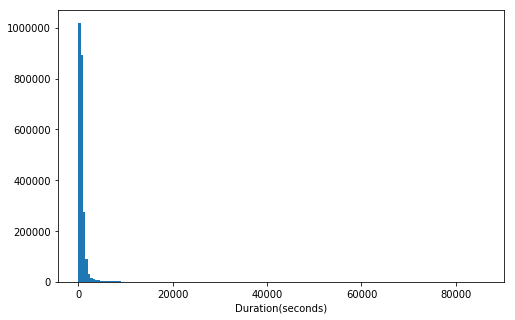

In [17]:
# start with the standard scale
#binsize = 500
bins = np.arange(0, bike_share['duration_sec'].max()+20, 500)
plt.figure(figsize= (8,5))
plt.hist(data = bike_share, x = 'duration_sec', bins = bins)
plt.xlabel('Duration(seconds)');

The plot above shows most of the data is set on the left suggesting thre may have some outliers on the right, beyong 10,100 on x axes.

In [18]:
# check for the outliers
duration_outlier = bike_share[bike_share['duration_sec'] > 10000]
duration_outlier

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,end_location
0,3305,68529,217.0,37.817015,-122.271761,27th St at MLK Jr Way,2019-01-01 15:05:21.558,NaN,NaN,217.0,37.817015,-122.271761,27th St at MLK Jr Way,2018-12-31 20:03:11.735,Customer,37.8170154-122.2717615
1,4281,63587,NaN,37.400000,-121.940000,NaN,2019-01-01 12:40:19.366,1995.0,Male,NaN,37.400000,-121.940000,NaN,2018-12-31 19:00:32.121,Customer,37.4-121.94
2,4267,64169,NaN,37.400000,-121.940000,NaN,2019-01-01 08:58:30.091,1988.0,Male,NaN,37.400000,-121.940000,NaN,2018-12-31 15:09:01.082,Customer,37.4-121.94
3,5422,30550,19.0,37.788975,-122.403452,Post St at Kearny St,2019-01-01 03:55:30.793,1986.0,Male,13.0,37.794231,-122.402923,Commercial St at Montgomery St,2018-12-31 19:26:20.775,Subscriber,37.788975-122.403452
208,3455,18354,95.0,37.766219,-122.431060,Sanchez St at 15th St,2018-12-31 20:47:48.698,1983.0,Female,74.0,37.776435,-122.426244,Laguna St at Hayes St,2018-12-31 15:41:54.041,Subscriber,37.7662185-122.4310597
235,5409,22374,323.0,37.798014,-122.405950,Broadway at Kearny,2018-12-31 20:30:26.483,1990.0,Male,23.0,37.791464,-122.391034,The Embarcadero at Steuart St,2018-12-31 14:17:32.146,Customer,37.798013644-122.405950427
240,5400,28131,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-12-31 20:27:10.581,1979.0,Female,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-12-31 12:38:19.429,Subscriber,37.7882999782-122.408530712
1108,2098,27635,245.0,37.870139,-122.268422,Downtown Berkeley BART,2018-12-31 15:57:40.091,1980.0,Male,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-12-31 08:17:04.917,Subscriber,37.870139-122.268422
1203,1683,11429,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-12-31 15:38:11.663,NaN,NaN,59.0,37.774814,-122.418954,S Van Ness Ave at Market St,2018-12-31 12:27:42.105,Customer,37.7838993571-122.408444881
1205,1428,11514,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-12-31 15:37:53.479,NaN,NaN,59.0,37.774814,-122.418954,S Van Ness Ave at Market St,2018-12-31 12:25:58.501,Customer,37.7838993571-122.408444881


After checking the records with duration beyong 10,000 seconds, we can see there are more than 14,000 records, and there are nothing special on these records, they are just because the duration is relatively long. The longest one is about 80k seconds, equals to 22 hours, it is still possible that someone borrow the bike for about 1 day.  So I decide not to filt out these records at this moment. I'll put the above plot in a log scale and see how it goes.

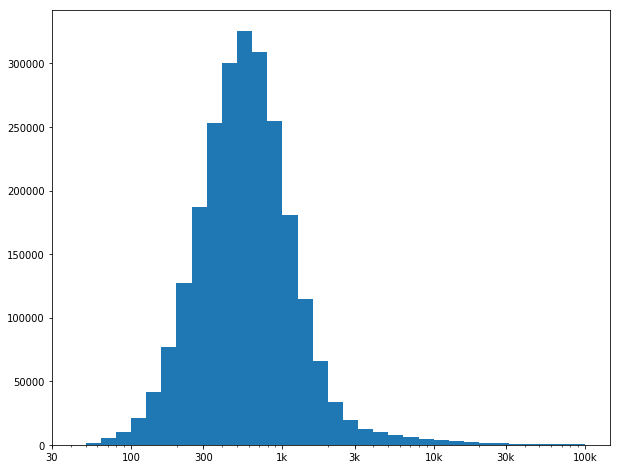

In [19]:
log_binsize = 0.1
bins = 10 ** np.arange(1.7, np.log10(bike_share['duration_sec'].max())+log_binsize, log_binsize)
plt.figure(figsize=[10, 8])
plt.hist(data = bike_share, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5], [30, 100, 300, '1k', '3k', '10k', '30k', '100k'])
plt.show()

From the plot of duration on log scale, We can see that the distribution of duration of bike sharing looks like nomal distribution with peak at 600 deconds, roughly 10 minutes.

Next, we will look at the start_time of the records. As most rides last about 10 minutes, and the longest one is less than 1 day, there won't be much difference between start time and end time when we use it to analyze the trend along the time.

So I will use the *start_time* column as the feature to gather the time information, including choosing it as a time series, extracting the information for hour, day in a week, month, year for each rides.

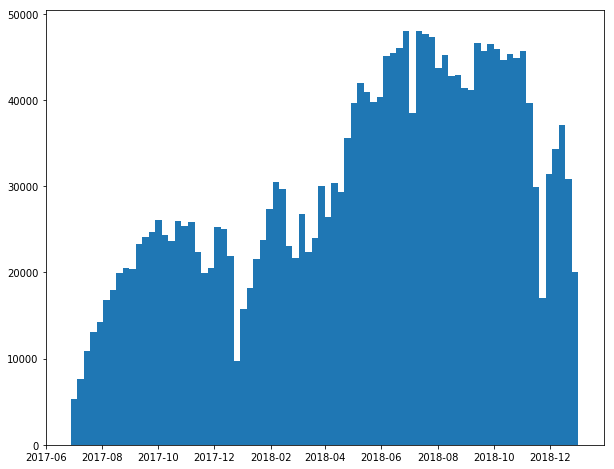

In [110]:
# plot the distribution for activities counts on time series
plt.figure(figsize=[10, 8])
plt.hist(data = bike_share, x = 'start_time', bins = 78)
plt.show()

From the plot above, the first thing we noticed is there is a big increase of number of bike sharing during May,2018 and June, 2018. It may be explained by increased station number, more bikes were put in the market, or any other market stratege change. 

Another thing attract us intention is, there are four big jump on rides number around end of November and December in bot 2017 and 2018. These jumps should be from the Thanksgiving and Christmas Holiday. 


Next, we will check how the duration change along the time, and compare to the counts distribution in Bivariate explore.

##### As I want to get the relation between the rides activities  with month, day, and hour. Three columns are created for these analysis in this section


In [21]:
bike_share.loc[:,'weekday'] = bike_share.loc[:,'start_time'].dt.weekday
bike_share.loc[:,'month'] = bike_share.loc[:,'start_time'].dt.month
bike_share.loc[:,'hour'] = bike_share.loc[:,'start_time'].dt.hour
bike_share.head()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,end_location,weekday,month,hour
0,3305,68529,217.0,37.817015,-122.271761,27th St at MLK Jr Way,2019-01-01 15:05:21.558,NaN,NaN,217.0,37.817015,-122.271761,27th St at MLK Jr Way,2018-12-31 20:03:11.735,Customer,37.8170154-122.2717615,0,12,20
1,4281,63587,NaN,37.400000,-121.940000,NaN,2019-01-01 12:40:19.366,1995.0,Male,NaN,37.400000,-121.940000,NaN,2018-12-31 19:00:32.121,Customer,37.4-121.94,0,12,19
2,4267,64169,NaN,37.400000,-121.940000,NaN,2019-01-01 08:58:30.091,1988.0,Male,NaN,37.400000,-121.940000,NaN,2018-12-31 15:09:01.082,Customer,37.4-121.94,0,12,15
3,5422,30550,19.0,37.788975,-122.403452,Post St at Kearny St,2019-01-01 03:55:30.793,1986.0,Male,13.0,37.794231,-122.402923,Commercial St at Montgomery St,2018-12-31 19:26:20.775,Subscriber,37.788975-122.403452,0,12,19
4,4820,2150,368.0,37.785434,-122.419622,Myrtle St at Polk St,2019-01-01 00:35:02.153,NaN,NaN,3.0,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2018-12-31 23:59:12.097,Customer,37.7854338279-122.419621646,0,12,23


Now, I will look at the rides counts varies along different time units: month, day in a week and hour in a day

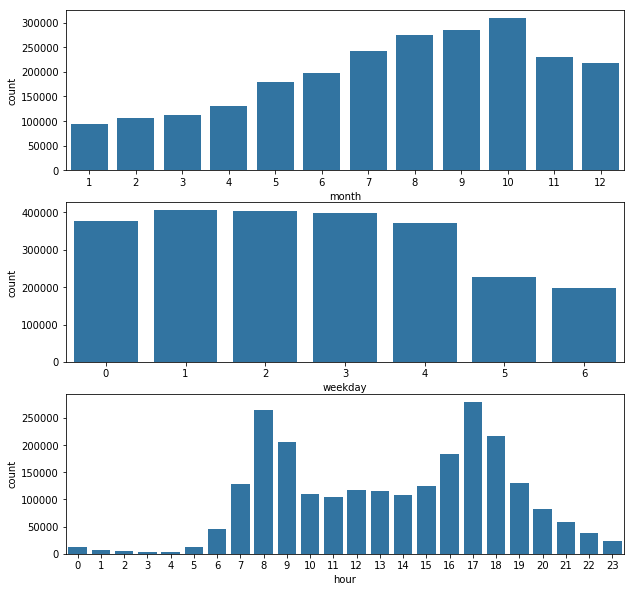

In [23]:
#plot 3 bar chart for month, weekday, hour in start_time respectively
base_color = sb.color_palette()[0]

plt.figure(figsize = [10, 10])
plt.subplot(3, 1, 1)
sb.countplot(data = bike_share, x = 'month', color = base_color);
plt.subplot(3, 1, 2)
sb.countplot(data = bike_share, x = 'weekday', color = base_color);
plt.subplot(3, 1, 3)
sb.countplot(data = bike_share, x = 'hour', color = base_color);

There are several insights we can obtain from the plots above.

1. For the month plot, there is a increase number of bike sharing rides from january to October. However as the lack of the data from 2017-1 to 2017-6-27, the plot for month is not a good explain for in which month bike sharing is taken more frequently. We need to plot the data only for year 2018 to depict the month variation.
2. From the weekday plot, we can see that most rides occurs at weekday. The hour plot shows two peaks around 8 am and 5 pm. With the information provided by the last 2 figures, we can guess most people use the bike sharing service for commute on weekday. 

In the next exploration, I would see how these variable correlation with duration and user_type

In [24]:
# creat a column contains the year for the start time
bike_share['year'] = bike_share['start_time'].dt.year

#creat a sub dataframe only contains the records for 2018 
#for better analysing of month information

bike_2018 = bike_share[bike_share['year'] == 2018].copy()


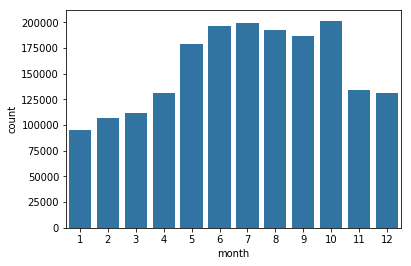

In [25]:
sb.countplot(data = bike_2018, x = 'month', color = base_color);

From the month plot for 2018, we can see the bike sharing service is used more frequently during summer time and early fall, from June to October.

#### This section, I will look at the features may help with the main features of interest

First, I want to look at the user_type of this dataset, see what's the proportions for memrber and casual

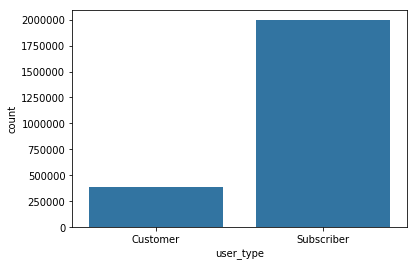

In [26]:
base_color = sb.color_palette()[0]
sb.countplot(data = bike_share, x = 'user_type', color = base_color);

We can see that, most of the customers owns a membership for FordGoBike

Next up, let's plot chart for member gender and member birth year.

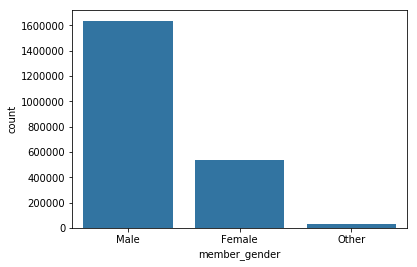

In [27]:

sb.countplot(data= bike_share, x = 'member_gender', color = base_color);

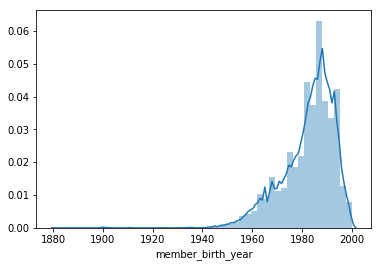

In [28]:
sb.distplot(bike_share['member_birth_year'].dropna());

In this plot, Male shows a much higher rate to use this service. And the birth year for members is concentrate on 1980-1995. In next bivariate exploration, we will check if this difference also shows in the same in other relations.

Since we are going to handle the missing values in member_gender and member birth year next, I want to check the distribution of user_type for the records with missing values.


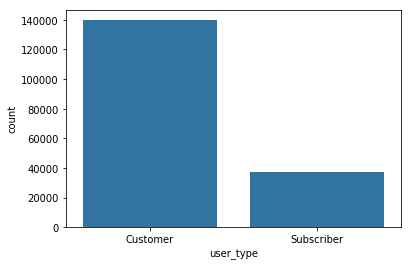

In [29]:
sb.countplot(bike_share[bike_share['member_gender'].isna()].user_type, color = base_color);

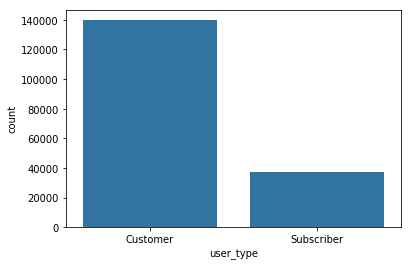

In [30]:
sb.countplot(bike_share[bike_share['member_birth_year'].isna()].user_type, color = base_color);

From the two bar charts, we can see the user_type distribution for records with member_gender and member_birth_year missing, is contrast with the original data. So I won't drop all these record with missing values, instead, I will creat a copy of the dataset `bike_share_gender_birth` with  records with missing values are dropped. I will use this dataframe for any data wrangling and visualization that may relate to member_gender and member_birth_year 

In [31]:
index_birth_year_na = bike_share['member_birth_year'].isna()
index_gender_na = bike_share['member_gender'].isna()

In [32]:
bike_share_gender_birth = bike_share[(bike_share['member_gender'].notna()) \
                        & (bike_share['member_birth_year'].notna())]

Also, We can see that there are some values from 1880-1920for member_birth_year colums,  these values seems not a real birth year.We'll see the records for these values.

In [33]:
bike_share_gender_birth[bike_share_gender_birth.member_birth_year <1920].member_birth_year.value_counts()

1900.0    774
1902.0    386
1911.0    274
1901.0     33
1888.0     23
1914.0     18
1904.0     12
1907.0      7
1881.0      5
1909.0      4
1889.0      3
1886.0      2
1906.0      2
1903.0      1
Name: member_birth_year, dtype: int64

It seems like people just selected the default value when then fill this information, so I will drop the rows with these unreasonable values

In [34]:
bike_share_gender_birth = bike_share_gender_birth\
                          [bike_share_gender_birth.member_birth_year >1920]

In [35]:
bike_share_gender_birth['member_birth_year'] = bike_share_gender_birth['member_birth_year'].astype(int)

#### Last, let's see the latitude and longitude of the stations

In [38]:
bike_share.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude,weekday,month,hour,year
count,2.383421e+06,2.383421e+06,2.371650e+06,2.383421e+06,2.383421e+06,2.206162e+06,2.371650e+06,2.383421e+06,2.383421e+06,2.383421e+06,2.383421e+06,2.383421e+06,2.383421e+06
mean,2.160719e+03,9.100063e+02,1.124780e+02,3.776798e+01,-1.223518e+02,1.982537e+03,1.142750e+02,3.776784e+01,-1.223524e+02,2.611557e+00,7.539704e+00,1.350274e+01,2.017782e+03
std,1.252545e+03,2.643865e+03,9.785323e+01,1.017500e-01,1.541098e-01,1.051346e+01,9.797252e+01,1.018623e-01,1.545178e-01,1.846110e+00,3.079040e+00,4.714829e+00,4.129202e-01
min,1.000000e+01,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,1.881000e+03,3.000000e+00,3.726331e+01,-1.224737e+02,0.000000e+00,1.000000e+00,0.000000e+00,2.017000e+03
25%,1.119000e+03,3.570000e+02,2.900000e+01,3.777166e+01,-1.224094e+02,1.977000e+03,3.000000e+01,3.777106e+01,-1.224116e+02,1.000000e+00,5.000000e+00,9.000000e+00,2.018000e+03
50%,2.173000e+03,5.640000e+02,8.100000e+01,3.778175e+01,-1.223971e+02,1.985000e+03,8.100000e+01,3.778127e+01,-1.223974e+02,3.000000e+00,8.000000e+00,1.400000e+01,2.018000e+03
75%,3.116000e+03,8.850000e+02,1.800000e+02,3.779539e+01,-1.222948e+02,1.990000e+03,1.810000e+02,3.779539e+01,-1.222948e+02,4.000000e+00,1.000000e+01,1.700000e+01,2.018000e+03
max,6.234000e+03,8.636900e+04,3.810000e+02,4.551000e+01,-7.357000e+01,2.000000e+03,3.810000e+02,4.551000e+01,-7.357000e+01,6.000000e+00,1.200000e+01,2.300000e+01,2.018000e+03


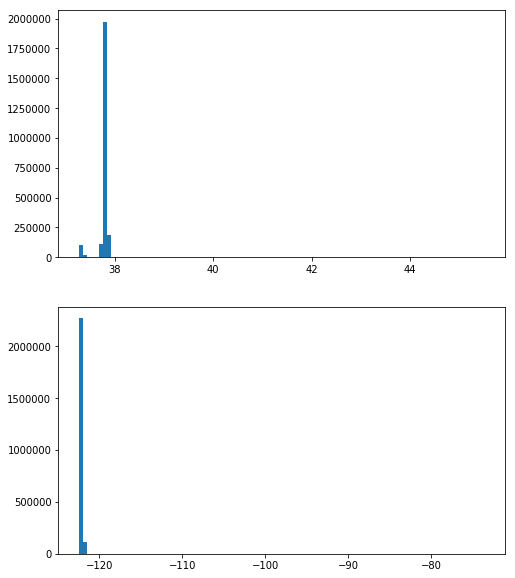

In [39]:
plt.figure(figsize = [8, 10])
plt.subplot(2, 1, 1)
plt.hist(data = bike_share, x = 'start_station_latitude', bins = 100)

plt.subplot(2,1,2)
plt.hist(data = bike_share, x = 'start_station_longitude', bins = 100)

plt.show()

From the plot, We can see most of the data is set on the far left, suggesting there are some outliers on the right. AS FordGoBike service is around Great San Fransico Area, the latitude and longitude shouldn't have such outliers. I'll display these records with latitude biger than 38 or longitude larger than -120

In [40]:
bike_share[(bike_share['start_station_latitude'] >38) | (bike_share['start_station_longitude'] > -120) ]

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,end_location,weekday,month,hour,year
720035,4425,501,NaN,45.51,-73.57,NaN,2018-08-21 12:20:13.500,1980.0,Male,NaN,45.50,-73.57,NaN,2018-08-21 12:11:52.500,Subscriber,45.51-73.57,1,8,12,2018
726875,4425,1023,NaN,45.51,-73.57,NaN,2018-08-20 12:24:09.500,1980.0,Male,NaN,45.50,-73.57,NaN,2018-08-20 12:07:06.500,Subscriber,45.51-73.57,0,8,12,2018
727473,4425,94,NaN,45.51,-73.57,NaN,2018-08-20 09:54:48.500,1980.0,Male,NaN,45.51,-73.57,NaN,2018-08-20 09:53:14.500,Subscriber,45.51-73.57,0,8,9,2018
768923,3763,3781,NaN,44.95,-93.22,NaN,2018-08-13 12:26:25.840,1987.0,Male,NaN,44.95,-93.22,NaN,2018-08-13 11:23:24.700,Subscriber,44.95-93.22,0,8,11,2018
1054857,4295,283,NaN,45.51,-73.57,NaN,2018-06-29 09:01:57.582,1977.0,Male,NaN,45.51,-73.57,NaN,2018-06-29 08:57:14.525,Subscriber,45.51-73.57,4,6,8,2018
1076475,3758,12944,NaN,44.95,-93.22,NaN,2018-06-26 14:34:57.186,1981.0,Female,NaN,44.95,-93.22,NaN,2018-06-26 10:59:12.446,Subscriber,44.95-93.22,1,6,10,2018
1101449,4295,1443,NaN,45.51,-73.57,NaN,2018-06-22 14:00:16.996,1977.0,Male,NaN,45.51,-73.57,NaN,2018-06-22 13:36:13.056,Subscriber,45.51-73.57,4,6,13,2018
1179213,4295,191,NaN,45.51,-73.57,NaN,2018-06-11 08:26:48.599,1989.0,Male,NaN,45.51,-73.57,NaN,2018-06-11 08:23:37.019,Subscriber,45.51-73.57,0,6,8,2018
1237414,4297,69,NaN,40.66,-74.01,NaN,2018-06-01 13:57:13.648,1976.0,Male,NaN,40.66,-74.01,NaN,2018-06-01 13:56:04.027,Subscriber,40.66-74.01,4,6,13,2018
1237431,4297,126,NaN,40.66,-74.01,NaN,2018-06-01 13:53:58.967,1987.0,Male,NaN,40.66,-74.01,NaN,2018-06-01 13:51:52.771,Subscriber,40.66-74.01,4,6,13,2018


We can not see any oddities on the records above, but as the latitudes or longitude of these records are not in the service area, we can not guarantee the validaty on these records, so I decide all these records.

In [41]:
bike_share = bike_share[(bike_share['start_station_latitude'] < 38) & (bike_share['start_station_longitude'] < -120)]


After removing these rows, let's see how the plots shows

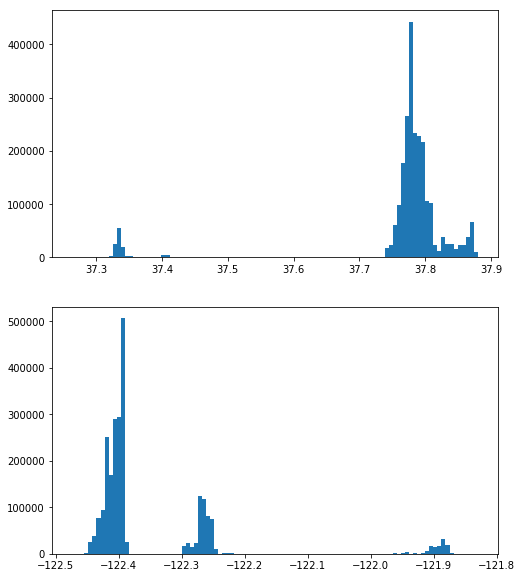

In [42]:
plt.figure(figsize = [8, 10])
plt.subplot(2, 1, 1)
plt.hist(data = bike_share, x = 'start_station_latitude', bins = 100)

plt.subplot(2,1,2)
plt.hist(data = bike_share, x = 'start_station_longitude', bins = 100)

plt.show()

We can see that after removing all the outliers, the plots show 3 spikes which indicates there are 3 major cities provide the service. the most popular city is the one with (37.78, -122.4).
Next, we will see if the end_station is consistent with the results of the above figures

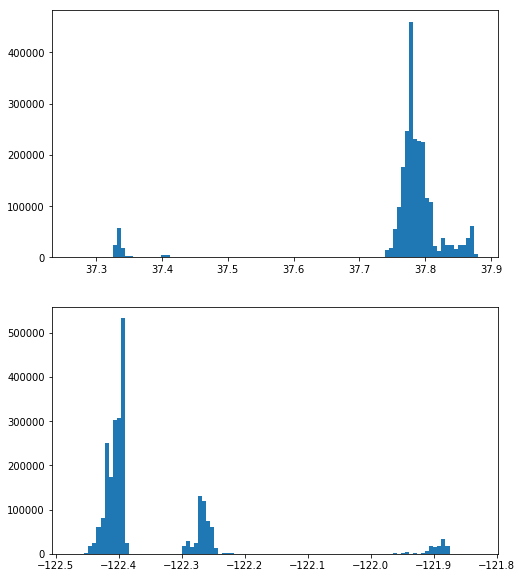

In [43]:
plt.figure(figsize = [8, 10])
plt.subplot(2, 1, 1)
plt.hist(data = bike_share, x = 'end_station_latitude', bins = 100)

plt.subplot(2,1,2)
plt.hist(data = bike_share, x = 'end_station_longitude', bins = 100)

plt.show()

As we can see, the location of end stations are similar with the figures of start stations. Next we can see if the location correlates with the duration of rides 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration of rides took a relatively large range of values from 1 minut to about 1 day. So I look at the data using a log transfer. Under this transformation, the data looks like normal distribution, with one peak around 600 seconds, 10 minutes,
> Also, for the time of the service used, we can see people mostly use them during summer time, weekday and rush hour.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the station location(latitude & longitude), a number of outliers were identified. These outliers shows loctions out of the area where the service provided. So I dropped of these records to keep all the data valid.
> For investigation of the time when rides taken, I change the start_time and end_time to datetime and extract the year, month, day, hour from it and assigned each for a new column  for better analysing 



## Bivariate Exploration



First, I want to look at relation between the time( year, month, weekday, hour ) and duration. 

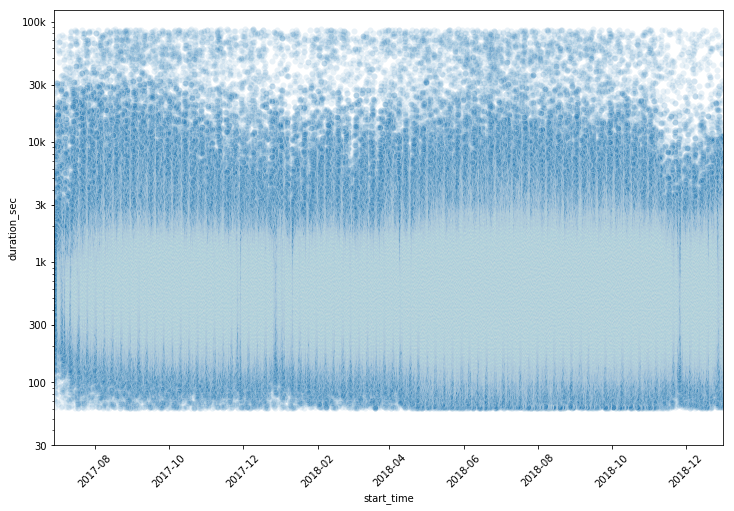

In [44]:
# plot a scatterplot for time vs duration, with duration in log
plt.figure(figsize = (12,8))
g = sb.scatterplot( x = bike_share['start_time'], y = bike_share['duration_sec'], alpha = 0.1)
g.set_xlim(bike_share['start_time'].min(), bike_share['start_time'].max())
plt.xticks(rotation=45)
plt.yscale('log')
plt.yticks([30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5], [30, 100, 300, '1k', '3k', '10k', '30k', '100k']);


We can see there are more dots from 20k to 30k overlapped during summer time. But there are too many data points, I want to try get a sample with size 50,000 data points and plot a scatterplot for it, to see if the relation will be more clearer

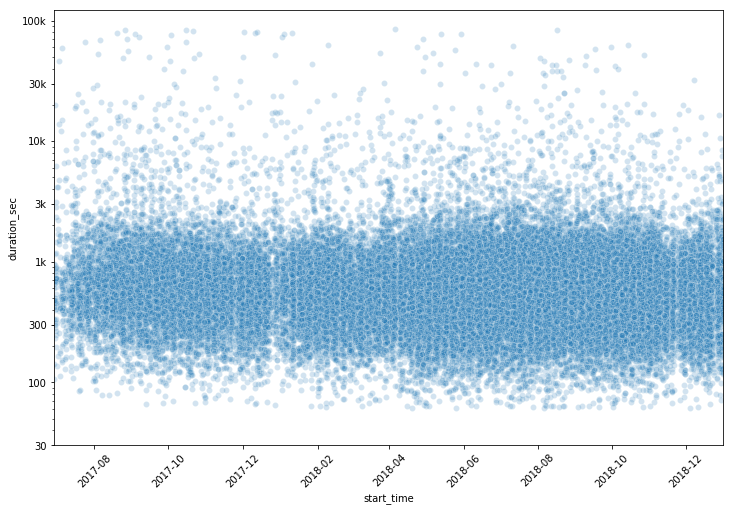

In [45]:
#plot a scatterplot for time vs duration for a 50,000 size sample

samples = np.random.choice(bike_share.shape[0], 50000, replace = False)
bike_samp = bike_share.loc[samples,:]
plt.figure(figsize = (12,8))
g = sb.scatterplot( x = bike_samp['start_time'], y = bike_samp['duration_sec'], alpha = 0.2)
g.set_xlim(bike_samp['start_time'].min(), bike_samp['start_time'].max())
plt.xticks(rotation=45)
plt.yscale('log')
plt.yticks([30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5], [30, 100, 300, '1k', '3k', '10k', '30k', '100k']);


Compare the two plots above, there are not much difference and no more information can be extract from them. Next, I will try to plot a line plot of time vs. duration

(array([ 736542.,  736603.,  736664.,  736726.,  736785.,  736846.,
         736907.,  736968.,  737029.]), <a list of 9 Text xticklabel objects>)

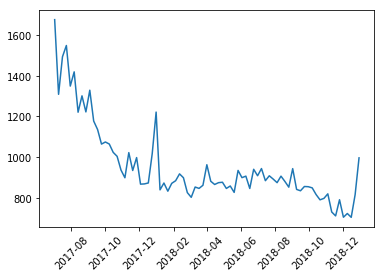

In [46]:
bin_size = pd.Timedelta('7 day')
xbin_edges = np.arange(bike_share['start_time'].min()-bin_size, bike_share['start_time'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]
data_xbins = pd.cut(bike_share['start_time'], xbin_edges, right = False, include_lowest = True)
y_means = bike_share['duration_sec'].groupby(data_xbins).mean()
y_sems = bike_share['duration_sec'].groupby(data_xbins).sem()
plt.errorbar(x = xbin_centers, y = y_means)
plt.xticks(rotation=45)


We can see here, the average duration decreased from 2017-7 can went to relatively stabe for year 2018 compared to 2017. This trend is contrast with histogram plot for time. That is, initially people use this service longer at average, but use less frequently.

Next, I want to see how the duration varies with hours, weekdays, month

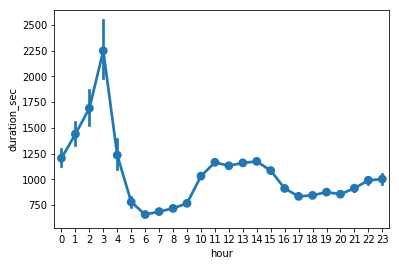

In [108]:
#plot the average duration agains hour
sb.pointplot(data = bike_share, x = 'hour', y = 'duration_sec');

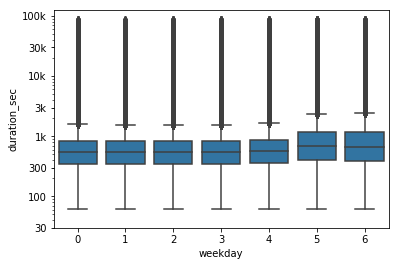

In [50]:
# plot the box plot for relation of duration agains day in a week
g = sb.boxplot(data = bike_share, x = 'weekday', y = 'duration_sec',color = base_color )
g.set(yscale="log")
plt.yticks([30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5], [30, 100, 300, '1k', '3k', '10k', '30k', '100k']);



We can see the difference of duration in different day in a week is not obvious for thie box plot as the wide distribution of duration. I will plot a bar chart for the average duration agains day in a week

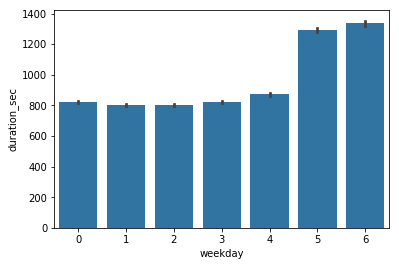

In [51]:
# plot bar chart for relation of avarage duration agains day in a week
sb.barplot(data = bike_share, x = 'weekday', y = 'duration_sec',color = base_color)


We can see from the chart, the average duration is significantly higher during weekends. Next, I will check for the month

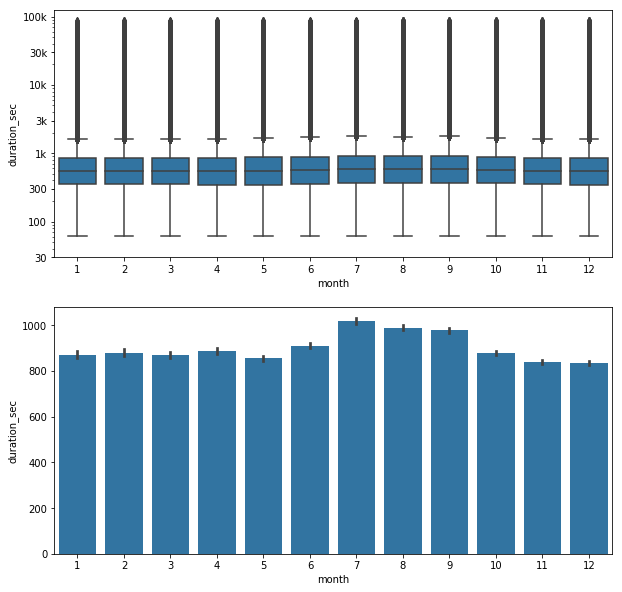

In [77]:
#plot a set of subplots for month agains average duration and duration median
plt.figure(figsize = (10,10))

plt.subplot(2,1,1)
g = sb.boxplot(data = bike_share, x = 'month', y = 'duration_sec', color = base_color)
g.set(yscale="log")
plt.yticks([30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5], [30, 100, 300, '1k', '3k', '10k', '30k', '100k']);

plt.subplot(2,1,2)
sb.barplot(data = bike_share, x = 'month', y = 'duration_sec',color = base_color)


We can see that, both the average duration and duration median value didn't change much along the different month, not like the counts plot

Next, I want to compare the average duration and rides counts agains 3 time units: month, day, hour.

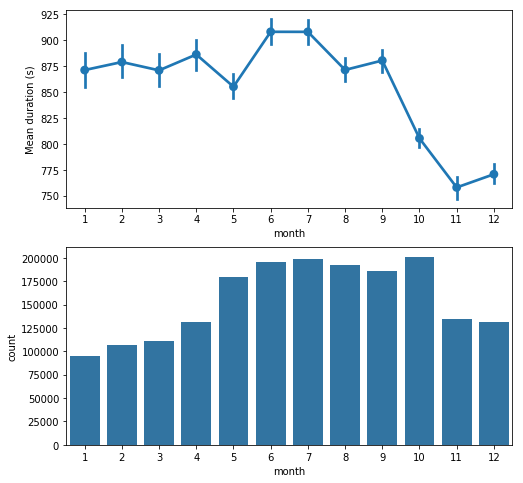

In [105]:
fig, ax = plt.subplots(nrows = 2, figsize = [8,8])
sb.pointplot(data = bike_2018, x = 'month', y = 'duration_sec', ax = ax[0]);
ax[0].set_ylabel('Mean duration (s)')

sb.countplot(data = bike_2018, x = 'month', color = base_color, ax = ax[1]);


            

For the month plot, we can see both the trends for  average duration and rides counts are similar. Although the line plot seems change more dramatically, the actual change for counts is much larger as the y axes start from 750 in line plot.

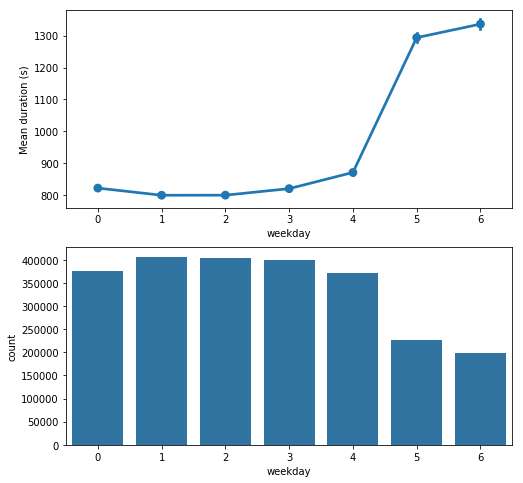

In [106]:
#plot the line plot and bar chart for average duration vs. weekday, counts for weekday
fig, ax = plt.subplots(nrows = 2, figsize = [8,8])
sb.pointplot(data = bike_share, x = 'weekday', y = 'duration_sec', ax = ax[0]);
ax[0].set_ylabel('Mean duration (s)')

sb.countplot(data = bike_share, x = 'weekday', color = base_color, ax = ax[1]);


We can see from the comparison, in a week, the number of rides is much higher than that in weekends. Nevertheless, the duration average is much higher during weekends. That's may come from different use of this service for weekdays or weekens 

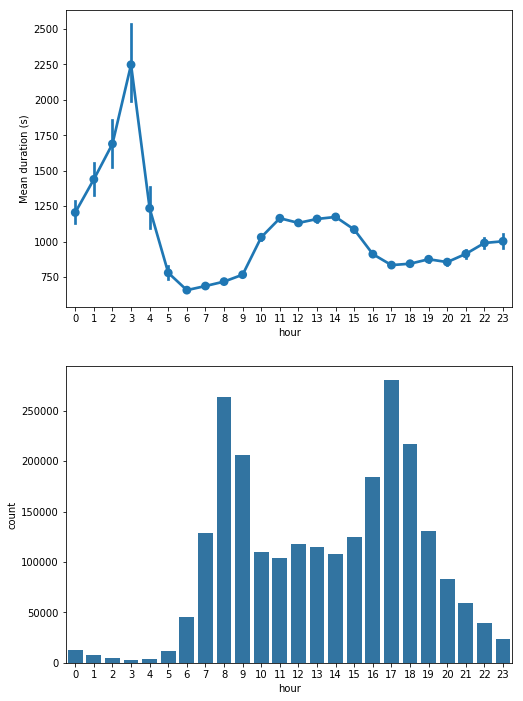

In [107]:
# plot the line plot and bar chart for average duration vs. weekday, counts for hour
fig, ax = plt.subplots(nrows = 2, figsize = [8,12])
sb.pointplot(data = bike_share, x = 'hour', y = 'duration_sec', ax = ax[0]);
ax[0].set_ylabel('Mean duration (s)')

sb.countplot(data = bike_share, x = 'hour', color = base_color, ax = ax[1]);

For the hour plots, the comparision for average duration and counts share the similar pattern with day in a week. When counts get high, the duration becomes short.

## When evaluate a business, both the usage counts and time for each usage are important.

Next, I want to look at the relations between month, weekday, with hour. So I can see how the rides activities varies in a day according to month or which day of a week.

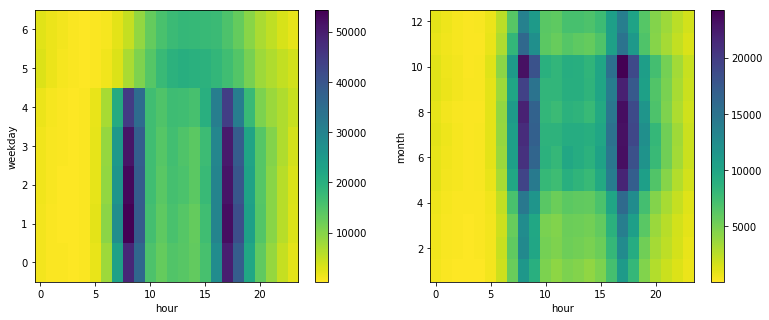

In [76]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
bins_x_w = np.arange(-0.5, 24.5, 1)
bins_y_w = np.arange(-0.5, 7.5, 1)
plt.hist2d(data = bike_share, x = 'hour', y = 'weekday',
           bins = [bins_x_w, bins_y_w], cmap = 'viridis_r', cmin = 0.5)
plt.xlabel('hour')
plt.ylabel('weekday')
plt.colorbar();

plt.subplot(1,2,2)
bins_x_m = np.arange(-0.5, 24.5, 1)
bins_y_m = np.arange(0.5, 13.5, 1)
plt.hist2d(data = bike_2018, x = 'hour', y = 'month',
           bins = [bins_x_m, bins_y_m], cmap = 'viridis_r', cmin = 0.5);

plt.colorbar();
plt.xlabel('hour')
plt.ylabel('month')
plt.show()

We can see from the heatmap that, most rides happened on weekdays are during rush hours. For weekends, most people use this service after 10 am and before 20:00. 
Also, people use this service more frequently from May to November during both daytime and night.

Next, I will explore the relation between the main interested feature(duration and time) and the user_type

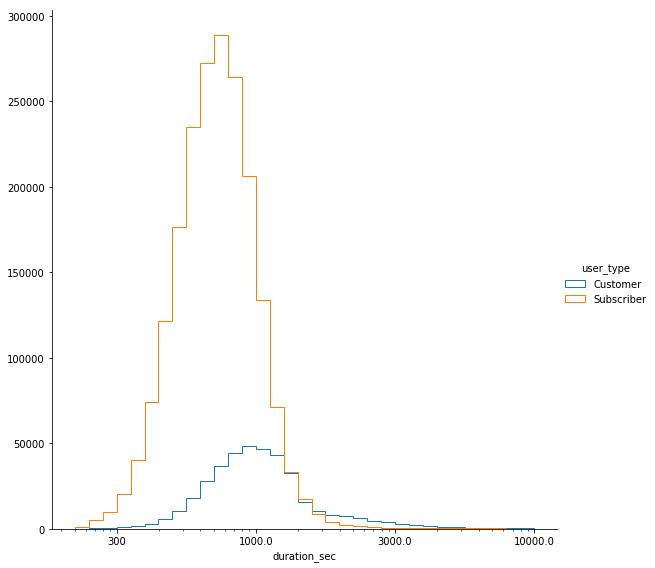

In [102]:
# plot the distribution of duration for both member and non-member user ina log x scale
log_binsize = 0.1
bins = 10 ** np.arange(1.7, np.log10(bike_share['duration_sec'].max())+log_binsize, log_binsize)

g = sb.FacetGrid(data = bike_share, hue = 'user_type', height = 8)
g.map(plt.hist, "duration_sec", bins = bins, histtype = 'step');
g.add_legend();
g.ax.set(xscale="log")
g.set_xticklabels([30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5], [30, 100, 300, '1k', '3k', '10k', '30k', '100k'])

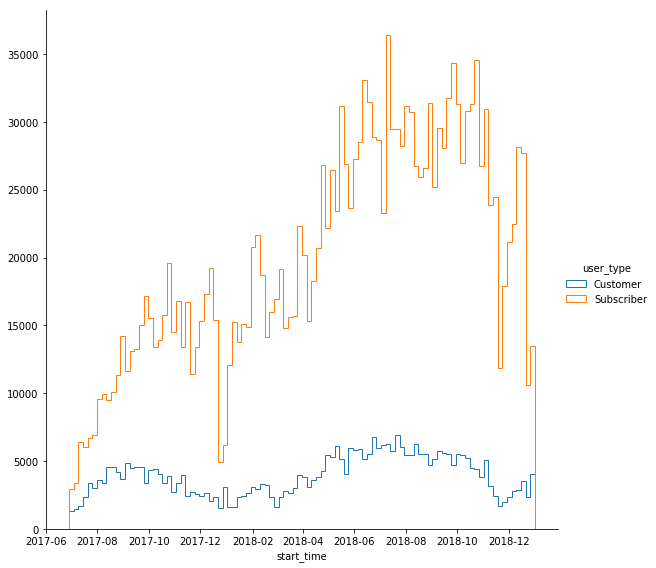

In [97]:
#plot the distribution counts for both member and non-member user 
g = sb.FacetGrid(data = bike_share, hue = 'user_type', height = 8)
g.map(plt.hist, "start_time", bins = 100, histtype = 'step');
g.add_legend();


We can see that, the distribution of duration and time of different user type are quite similar. But here are 2 things we need to pay attention. 
1. for duration disctribution, more non-member user use the service beyond 2.5k seconds
2. for the 2 holiday period, Thanksgiving and Christmas, number of rides from user with membership decreased while the number from non-member users has increased. 

To dig in deeper on these contrast, I will look at the average duration agains month/ day in a week/ hour in a day for different user types in multivariates explore


Next, I want to see the relation of another feature about users, feature gender agains time .

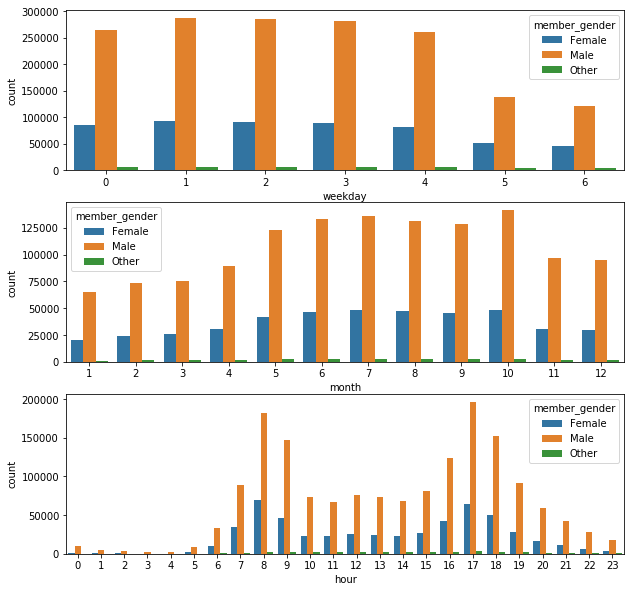

In [514]:
plt.figure(figsize = [10, 10])
# subplot 1: weekday vs user type
plt.subplot(3, 1, 1)
sb.countplot(data = bike_share, x = 'weekday', hue = 'member_gender')
# subplot 2: month vs user type(data for year 2018 is used)
plt.subplot(3, 1, 2)
sb.countplot(data = bike_2018, x = 'month', hue = 'member_gender')

#subplot 3: hour vs user type
plt.subplot(3, 1, 3)
sb.countplot(data = bike_share, x = 'hour', hue = 'member_gender')

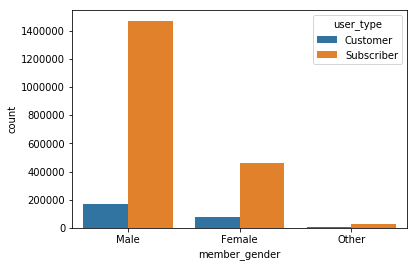

In [109]:
sb.countplot(data = bike_share, x = 'member_gender', hue = 'user_type')

From the plots above, we can see that, the trend for different gender are almost the same. So I won't dig in more for this feature.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The first relationship I observed is the comparision of counts for rides and average duration for rides. In plots where these two variables agains hour and day, the trends for these two variables are contrast. I guess this from different usage and different user type. So in the next exploraion, I will add the user type to see hoe these change.
Also, for the relationships for duration and time agains user type, the duration distribution are quite similar except the points beyong 2.5k seconds. The count distribution along the time are also similar for both user types, except druing the 2 holidays, ThanksGiving and Christmas
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The gender distribution between the different user types are similar. No interesting relationships found, so no more exploration will continue on this feature

## Multivariate Exploration



First I want to look at average uration change against different time units for different user types

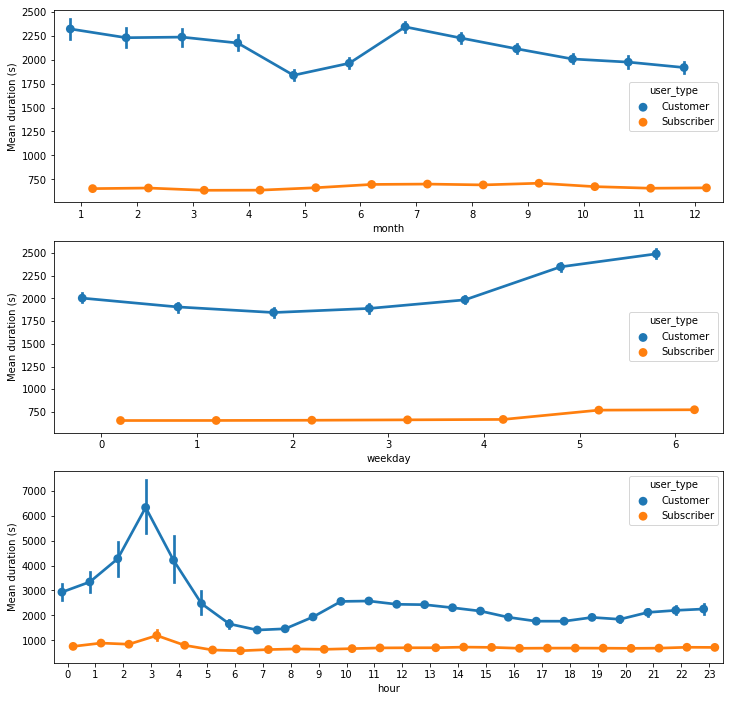

In [103]:
#plot the point plots for mean duration agains hour, weekday, month, 
#with user_type variable added
fig, ax = plt.subplots(nrows = 3, figsize = [12,12])

sb.pointplot(data = bike_share, x = 'month', y = 'duration_sec', hue = 'user_type',\
             dodge = 0.4, ax = ax[0])
ax[0].set_title('')
ax[0].set_ylabel('Mean duration (s)')


sb.pointplot(data = bike_share, x = 'weekday', y = 'duration_sec', hue = 'user_type',\
             dodge = 0.4, ax = ax[1])
ax[1].set_title('')
ax[1].set_ylabel('Mean duration (s)')

sb.pointplot(data = bike_share, x = 'hour', y = 'duration_sec', hue = 'user_type',\
             dodge = 0.4, ax = ax[2])
ax[2].set_title('')
ax[2].set_ylabel('Mean duration (s)')

plt.show();

From the figures above, we can see that the usage time for non-members are much higher than that of members. Also, the usage time for non-member users changes more dramatically according to time, date.

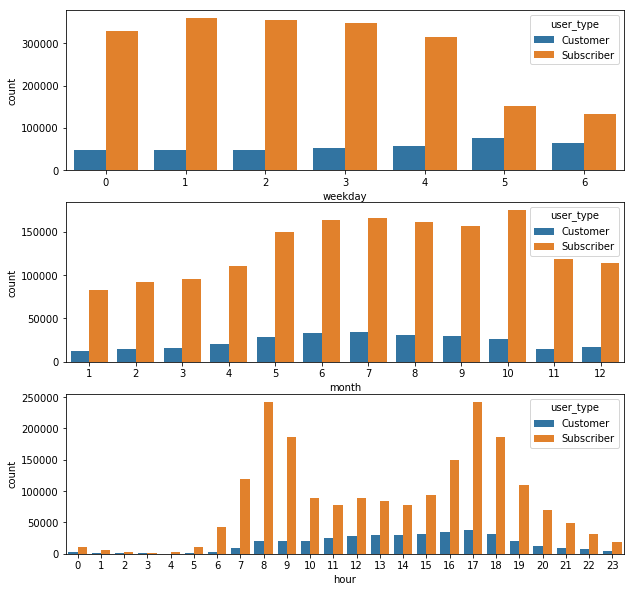

In [513]:
plt.figure(figsize = [10, 10])
# subplot 1: weekday vs user type
plt.subplot(3, 1, 1)
sb.countplot(data = bike_share, x = 'weekday', hue = 'user_type')
# subplot 2: month vs user type(data for year 2018 is used)
plt.subplot(3, 1, 2)
sb.countplot(data = bike_2018, x = 'month', hue = 'user_type')

#subplot 3: hour vs user type
plt.subplot(3, 1, 3)
sb.countplot(data = bike_share, x = 'hour', hue = 'user_type')

We can see from plots, in a week, the difference in rides between member and non-member users in weekdays are much larger than weekends. Also, for each hour in a day, the difference in rides between member and non-member during the rush hours are much larger than other time. Also, members are use the service during rush hour, non-member use it more during 10am to 4pm. It seems like people will prefer have membership if they use the service regularly and for commute.
For each month of the year, the difference don't varies much

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended the investigation of average duration of rides against hour/weekday/month in this section by looking at the trends for different user type. 
The first thing observed is, the trends for the average of duration along month, day in a week, or hours in a day are different in respect to user type. This different strenghened the guessing that most users are using this service for commute. And those who use this as a commute method will prefer a membership for it.

